# Intro:
 
Cryptocurrency represents a relatively new and distinct form of currency that shares some similarities with both fiat money and commodity money, yet also possesses unique characteristics due to its digital and decentralized nature. Let's explore how cryptocurrency compares to these traditional forms of money:

## Similarities to Commodity Money:

Limited Supply: Like commodity money, many cryptocurrencies have a predefined maximum supply. For example, Bitcoin has a fixed supply of 21 million coins, which is meant to mimic the scarcity aspect of commodities.

Decentralization: Cryptocurrencies often operate on decentralized networks, which means they are not controlled by a single entity (like a central bank). This is reminiscent of the decentralized nature of commodity money.

## Differences from Commodity Money:

Intrinsic Value: Unlike commodity money, cryptocurrencies do not have intrinsic value. Their value is largely driven by market demand, supply dynamics, and speculative trading. They lack a physical backing or direct linkage to a tangible commodity.

Digital Nature: Cryptocurrencies are purely digital assets that exist in the form of code on distributed ledgers (blockchains). They lack the physical presence associated with commodity money.

## Similarities to Fiat Money:

Trust-Based Value: Similar to fiat money, the value of cryptocurrencies is largely based on trust and belief in their utility, security, and potential for adoption.

Acceptance as Medium of Exchange: Cryptocurrencies are accepted as a medium of exchange in various transactions and can be used for online purchases, investment, remittances, and more, akin to how fiat money is used.

Government Independence: Just as fiat money can exist independently of a commodity backing, cryptocurrencies operate independently of governmental control. They are not issued or regulated by any central authority.

## Differences from Fiat Money:

Decentralization: While both cryptocurrencies and fiat money can be decentralized in their operation (e.g., through distributed ledger technology), most fiat money is still ultimately managed by central banks or governments, whereas cryptocurrencies operate on decentralized networks.

Volatility: Cryptocurrencies tend to exhibit much higher price volatility compared to most fiat currencies. This volatility can be a result of speculative trading, market sentiment, and relatively small market sizes.

In essence, cryptocurrencies combine certain aspects of both commodity money and fiat money while introducing their own unique features. They are digital assets that rely on decentralized technology and market demand for their value. The lack of intrinsic value and the presence of extreme price volatility distinguish cryptocurrencies from traditional forms of money. Their role in the global economy and financial landscape continues to evolve as they gain wider acceptance and use cases.

# `EDA` (Exploratory Data Analysis)

Debes realizar un análisis exploratorio de los datos en un notebook. Tienen que estar tus pasos documentados con claridad, con las conclusiones correspondientes en cada gráfico empleado y análisis de lo que vas observando, utilizando celdas Markdown para tal fin. La prolijidad del notebook será un aspecto a evaluar. Es importante que tengas en cuenta que, en muchas oportunidades y trabajos, un EDA constituye un entregable en sí mismo.

En esta línea, hay varios aspectos indispensables que **deben** ser abordados en cualquier Análisis Exploratorio de Datos y tomaremos como punto de partida para evaluar tu performance en este apartado. Entre estos aspectos destacados se encuentran: 

### *búsqueda de valores faltantes, valores atípicos/extremos u outliers y registros duplicados*. 

Asimismo, la utilización de gráficos coherentes según la tipología de variable que corresponda resulta esencial.

***En caso de hacer uso de librerías como pandas_profiling, es indispensable acompañar los gráficos con análisis propios.***

## 📚 Libreries:

In [2]:
import requests
import pandas as pd
import seaborn as sns
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import time  # Import the time module
import numpy as np

## 🔌 [API CoinGecko](https://www.coingecko.com/es/api/documentation): conection 

### 🌎📰 Trending top 7:
Top-7 trending coins on CoinGecko as searched by users in the last 24 hours (Ordered by most popular first).

In [2]:
def get_coin_list():
    url = "https://api.coingecko.com/api/v3/search/trending"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        global_trends = response.json()
        coins_data_global_trends = global_trends.get('coins', [])  # Extract coins data
        
        coins_global_trends = pd.DataFrame([item['item'] for item in coins_data_global_trends])  # Create DataFrame for coins
        
        return coins_global_trends
    else:
        print("Error en la solicitud: Listado de monedas", response.status_code)
        return None

if __name__ == "__main__":
    coins_global_trends = get_coin_list()
    if coins_global_trends is not None:
        print("Coins DataFrame:")
        print(coins_global_trends)



Coins DataFrame:
               id  coin_id            name symbol  market_cap_rank  \
0            pepe    29850            Pepe   PEPE               94   
1     sei-network    28205             Sei    SEI              122   
2         bitrock    30987         Bitrock  BROCK              882   
3  bone-shibaswap    16916  Bone ShibaSwap   BONE              103   
4   akash-network    12785   Akash Network    AKT              111   
5          komodo      611          Komodo    KMD              434   
6   worldcoin-wld    31069       Worldcoin    WLD              171   

                                               thumb  \
0  https://assets.coingecko.com/coins/images/2985...   
1  https://assets.coingecko.com/coins/images/2820...   
2  https://assets.coingecko.com/coins/images/3098...   
3  https://assets.coingecko.com/coins/images/1691...   
4  https://assets.coingecko.com/coins/images/1278...   
5  https://assets.coingecko.com/coins/images/611/...   
6  https://assets.coingecko.co

In [3]:
coins_global_trends = coins_global_trends.applymap(lambda x: x.lower() if isinstance(x, str) else x)

print(coins_global_trends)

               id  coin_id            name symbol  market_cap_rank  \
0            pepe    29850            pepe   pepe               94   
1     sei-network    28205             sei    sei              122   
2         bitrock    30987         bitrock  brock              882   
3  bone-shibaswap    16916  bone shibaswap   bone              103   
4   akash-network    12785   akash network    akt              111   
5          komodo      611          komodo    kmd              434   
6   worldcoin-wld    31069       worldcoin    wld              171   

                                               thumb  \
0  https://assets.coingecko.com/coins/images/2985...   
1  https://assets.coingecko.com/coins/images/2820...   
2  https://assets.coingecko.com/coins/images/3098...   
3  https://assets.coingecko.com/coins/images/1691...   
4  https://assets.coingecko.com/coins/images/1278...   
5  https://assets.coingecko.com/coins/images/611/...   
6  https://assets.coingecko.com/coins/images/31

In [4]:
coins_global_trends.head(10)

,id,coin_id,name,symbol,market_cap_rank,thumb,small,large,slug,price_btc,score
0,pepe,29850,pepe,pepe,94,https://assets.coingecko.com/coins/images/2985...,https://assets.coingecko.com/coins/images/2985...,https://assets.coingecko.com/coins/images/2985...,pepe,3.583937e-11,0
1,sei-network,28205,sei,sei,122,https://assets.coingecko.com/coins/images/2820...,https://assets.coingecko.com/coins/images/2820...,https://assets.coingecko.com/coins/images/2820...,sei,5.702732e-06,1
2,bitrock,30987,bitrock,brock,882,https://assets.coingecko.com/coins/images/3098...,https://assets.coingecko.com/coins/images/3098...,https://assets.coingecko.com/coins/images/3098...,bitrock,4.243262e-06,2
3,bone-shibaswap,16916,bone shibaswap,bone,103,https://assets.coingecko.com/coins/images/1691...,https://assets.coingecko.com/coins/images/1691...,https://assets.coingecko.com/coins/images/1691...,bone-shibaswap,5.391797e-05,3
4,akash-network,12785,akash network,akt,111,https://assets.coingecko.com/coins/images/1278...,https://assets.coingecko.com/coins/images/1278...,https://assets.coingecko.com/coins/images/1278...,akash-network,5.432163e-05,4
5,komodo,611,komodo,kmd,434,https://assets.coingecko.com/coins/images/611/...,https://assets.coingecko.com/coins/images/611/...,https://assets.coingecko.com/coins/images/611/...,komodo,1.124743e-05,5
6,worldcoin-wld,31069,worldcoin,wld,171,https://assets.coingecko.com/coins/images/3106...,https://assets.coingecko.com/coins/images/3106...,https://assets.coingecko.com/coins/images/3106...,worldcoin,5.320359e-05,6


In [5]:
coins_global_trends['score'] = 7 - coins_global_trends['score'] 

In [6]:
coins_global_trends.head(10)

,id,coin_id,name,symbol,market_cap_rank,thumb,small,large,slug,price_btc,score
0,pepe,29850,pepe,pepe,94,https://assets.coingecko.com/coins/images/2985...,https://assets.coingecko.com/coins/images/2985...,https://assets.coingecko.com/coins/images/2985...,pepe,3.583937e-11,7
1,sei-network,28205,sei,sei,122,https://assets.coingecko.com/coins/images/2820...,https://assets.coingecko.com/coins/images/2820...,https://assets.coingecko.com/coins/images/2820...,sei,5.702732e-06,6
2,bitrock,30987,bitrock,brock,882,https://assets.coingecko.com/coins/images/3098...,https://assets.coingecko.com/coins/images/3098...,https://assets.coingecko.com/coins/images/3098...,bitrock,4.243262e-06,5
3,bone-shibaswap,16916,bone shibaswap,bone,103,https://assets.coingecko.com/coins/images/1691...,https://assets.coingecko.com/coins/images/1691...,https://assets.coingecko.com/coins/images/1691...,bone-shibaswap,5.391797e-05,4
4,akash-network,12785,akash network,akt,111,https://assets.coingecko.com/coins/images/1278...,https://assets.coingecko.com/coins/images/1278...,https://assets.coingecko.com/coins/images/1278...,akash-network,5.432163e-05,3
5,komodo,611,komodo,kmd,434,https://assets.coingecko.com/coins/images/611/...,https://assets.coingecko.com/coins/images/611/...,https://assets.coingecko.com/coins/images/611/...,komodo,1.124743e-05,2
6,worldcoin-wld,31069,worldcoin,wld,171,https://assets.coingecko.com/coins/images/3106...,https://assets.coingecko.com/coins/images/3106...,https://assets.coingecko.com/coins/images/3106...,worldcoin,5.320359e-05,1


In [7]:
list_rank = coins_global_trends['symbol'].tolist()

In [8]:
coins_global_trends.rename(columns={'id': 'crip_id'}, inplace=True)

#### Guardo csv: coins_global_trends.csv

In [9]:
coins_global_trends.to_csv('../Csvs_cleanned/coins_global_trends.csv', index=False, mode='w',header=True)

In [10]:
list_rank

['pepe', 'sei', 'brock', 'bone', 'akt', 'kmd', 'wld']

_____________________________________________________________

### 🌎📊  Global data:
Get global data - total_volume, total_market_cap, ongoing icos etc

#### Conection:

In [11]:

def get_coin_list():
    url = "https://api.coingecko.com/api/v3/global"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        global_data = response.json()
        list_of_global_data = pd.DataFrame(global_data)
        return list_of_global_data
    else:
        print("Error en la solicitud: Listado de monedas", response.status_code)
        return None

if __name__ == "__main__":
    list_of_global_data = get_coin_list()
    if list_of_global_data is not None:
        print(list_of_global_data)

                                                                                   data
active_cryptocurrencies                                                           10187
ended_icos                                                                         3376
market_cap_change_percentage_24h_usd                                          -1.365613
market_cap_percentage                 {'btc': 46.42628031916214, 'eth': 18.178685345...
markets                                                                             837
ongoing_icos                                                                         49
total_market_cap                      {'btc': 41930890.01048624, 'eth': 661292548.78...
total_volume                          {'btc': 1849854.899819671, 'eth': 29174082.908...
upcoming_icos                                                                         0
updated_at                                                                   1692914534


#### Market_cap_percentage: %

In [12]:
# Extraer el contenido del diccionario en la columna "market_cap_percentage"
market_cap_percentage_dict = list_of_global_data.at['market_cap_percentage', 'data']

# Crear un DataFrame a partir del diccionario
market_cap_percentage_df = pd.DataFrame(market_cap_percentage_dict.items(), columns=['crip_id', 'market_cap_percentage'])

# Imprimir el nuevo DataFrame
print(market_cap_percentage_df)


  crip_id  market_cap_percentage
0     btc              46.426280
1     eth              18.178685
2    usdt               7.576523
3     bnb               3.054377
4     xrp               2.509268
5    usdc               2.367245
6   steth               1.264781
7     ada               0.849905
8    doge               0.806161
9     sol               0.779847


#### Market_cap: $

In [13]:
total_market_cap_dict = list_of_global_data.at['total_market_cap', 'data']

# Crear un DataFrame a partir del diccionario
total_market_cap_df = pd.DataFrame(total_market_cap_dict.items(), columns=['crip_id', 'total_market_cap'])

# Imprimir el nuevo DataFrame
print(total_market_cap_df)

   crip_id  total_market_cap
0      btc      4.193089e+07
1      eth      6.612925e+08
2      ltc      1.695429e+10
3      bch      5.712490e+09
4      bnb      5.037306e+09
..     ...               ...
56     xdr      8.223010e+11
57     xag      4.533856e+10
58     xau      5.705597e+08
59    bits      4.193089e+13
60    sats      4.193089e+15

[61 rows x 2 columns]


#### Total_volume: $

In [14]:
# Extraer el contenido del diccionario en la columna "market_cap_percentage"
total_volume_dict = list_of_global_data.at['total_volume', 'data']

# Crear un DataFrame a partir del diccionario
total_volume_df = pd.DataFrame(total_volume_dict.items(), columns=['crip_id', 'total_volume'])

# Imprimir el nuevo DataFrame
print(total_volume_df)

   crip_id  total_volume
0      btc  1.849855e+06
1      eth  2.917408e+07
2      ltc  7.479684e+08
3      bch  2.520166e+08
4      bnb  2.222296e+08
..     ...           ...
56     xdr  3.627726e+10
57     xag  2.000190e+09
58     xau  2.517124e+07
59    bits  1.849855e+12
60    sats  1.849855e+14

[61 rows x 2 columns]


#### Merged:

In [15]:
merged_df = market_cap_percentage_df.merge(total_market_cap_df, on='crip_id').merge(total_volume_df, on='crip_id')
merged_df = merged_df.sort_values(by=['market_cap_percentage', 'total_volume'], ascending=[False, False])

print(merged_df)


  crip_id  market_cap_percentage  total_market_cap  total_volume
0     btc              46.426280      4.193089e+07  1.849855e+06
1     eth              18.178685      6.612925e+08  2.917408e+07
2     bnb               3.054377      5.037306e+09  2.222296e+08
3     xrp               2.509268      2.115016e+12  9.330764e+10


#### Guardo csv: tops_criptos.csv

In [16]:
merged_df.to_csv('../Csvs_cleanned/top_criptos.csv', index=False, mode='w',header=True)

#### Combinacion, listado de codigos en los listados recientemente importados:

In [17]:
lista_coins0 = merged_df['crip_id'].tolist()
lista_coins1 = market_cap_percentage_df['crip_id'].tolist()
lista_coins2 = total_market_cap_df['crip_id'].tolist()
lista_coins3 = total_volume_df['crip_id'].tolist()

In [18]:
complete_list = lista_coins0 + lista_coins1 + list_rank #+ lista_coins2 + lista_coins3
complete_list = list(set(complete_list)) #quitar duplicados

##### Listado completo de ids a buscar como los mas recomendados en base a marketcap y total volume de cada cripto. HOY, YA!, AHORA!.

In [19]:
len(complete_list)

17

In [20]:
complete_list_lower = [item.lower() if isinstance(item, str) else item for item in complete_list]


In [21]:
complete_list_lower

['xrp',
 'eth',
 'akt',
 'usdt',
 'sol',
 'sei',
 'ada',
 'pepe',
 'brock',
 'kmd',
 'bone',
 'steth',
 'usdc',
 'bnb',
 'doge',
 'wld',
 'btc']

### 🪙📚 Listado de monedas: 

#### Importando listado de ids criptos API coingecko: Obteniendo el listado de ids anteriormente destacados, o al menos todos los que se encuentren disponibles en API

In [22]:
def get_coin_list():
    url = "https://api.coingecko.com/api/v3/coins/list?include_platform=false"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        coin_list = response.json()
        coin_id = pd.DataFrame(coin_list)
        return coin_id
    else:
        print("Error en la solicitud: Listado de monedas", response.status_code)
        return None

if __name__ == "__main__":
    coin_id = get_coin_list()
    if coin_id is not None:
        print(coin_id)


                             id symbol                       name
0                        01coin    zoc                     01coin
1                        0chain    zcn                        Zus
2                 0vix-protocol    vix              0VIX Protocol
3                            0x    zrx                0x Protocol
4      0x0-ai-ai-smart-contract    0x0  0x0.ai: AI Smart Contract
...                         ...    ...                        ...
10182                 zyberswap    zyb                  Zyberswap
10183                  zynecoin    zyn                   Zynecoin
10184                   zynergy    zyn                    Zynergy
10185                       zyx    zyx                        ZYX
10186                       zzz    zzz                GoSleep ZZZ

[10187 rows x 3 columns]


In [23]:
coin_id.head(15)

,id,symbol,name
0,01coin,zoc,01coin
1,0chain,zcn,Zus
2,0vix-protocol,vix,0VIX Protocol
3,0x,zrx,0x Protocol
4,0x0-ai-ai-smart-contract,0x0,0x0.ai: AI Smart Contract
5,0x1-tools-ai-multi-tool,0x1,0x1.tools: AI Multi-tool
6,0xauto-io-contract-auto-deployer,0xa,0xAuto.io : Contract Auto Deployer
7,0xcoco,coco,0xCoco
8,0xdao,oxd,0xDAO
9,0xdao-v2,oxd v2,0xDAO V2


In [24]:
coin_id.shape

(10187, 3)

In [25]:
coin_id = coin_id.drop_duplicates()

#### Filtrado De las mas relevantes:

In [26]:
coin_id = coin_id[
    coin_id['symbol'].isin(complete_list) |
    coin_id['id'].isin(complete_list) |
    coin_id['name'].isin(complete_list)
]


In [27]:
coin_id.head(20)

,id,symbol,name
300,akash-network,akt,Akash Network
1108,binancecoin,bnb,BNB
1109,binance-coin-wormhole,bnb,Binance Coin (Wormhole)
1115,binance-peg-cardano,ada,Binance-Peg Cardano
1116,binance-peg-dogecoin,doge,Binance-Peg Dogecoin
1124,binance-peg-xrp,xrp,Binance-Peg XRP
1163,bitcoin,btc,Bitcoin
1231,bitrock,brock,Bitrock
1405,bone-2,bone,Bone
1407,bone-shibaswap,bone,Bone ShibaSwap


In [28]:
coin_id.shape

(47, 3)

In [29]:
coin_id.rename(columns={'id': 'crip_id'}, inplace=True)

In [30]:
coin_id.isnull().sum()

crip_id    0
symbol     0
name       0
dtype: int64

In [31]:
coin_id.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, 300 to 9780
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   crip_id  47 non-null     object
 1   symbol   47 non-null     object
 2   name     47 non-null     object
dtypes: object(3)
memory usage: 1.5+ KB


In [32]:
coin_id['crip_id'] = coin_id['crip_id'].str.lower()
coin_id['symbol'] = coin_id['symbol'].str.lower()
coin_id['name'] = coin_id['name'].str.lower()

In [33]:

coin_id = coin_id.applymap(lambda x: x.lower() if isinstance(x, str) else x)

print(coin_id)

                                                crip_id symbol  \
300                                       akash-network    akt   
1108                                        binancecoin    bnb   
1109                              binance-coin-wormhole    bnb   
1115                                binance-peg-cardano    ada   
1116                               binance-peg-dogecoin   doge   
1124                                    binance-peg-xrp    xrp   
1163                                            bitcoin    btc   
1231                                            bitrock  brock   
1405                                             bone-2   bone   
1407                                     bone-shibaswap   bone   
1408                                           boneswap   bone   
1409                                         bone-token   bone   
1471                               bridged-tether-linea   usdt   
1472                            bridged-tether-stargate   usdt   
1476      

In [34]:
coin_id = coin_id.reset_index(drop=True)

In [35]:
coin_id.head(10)

,crip_id,symbol,name
0,akash-network,akt,akash network
1,binancecoin,bnb,bnb
2,binance-coin-wormhole,bnb,binance coin (wormhole)
3,binance-peg-cardano,ada,binance-peg cardano
4,binance-peg-dogecoin,doge,binance-peg dogecoin
5,binance-peg-xrp,xrp,binance-peg xrp
6,bitcoin,btc,bitcoin
7,bitrock,brock,bitrock
8,bone-2,bone,bone
9,bone-shibaswap,bone,bone shibaswap


In [36]:
coin_id.shape

(47, 3)

##### Guardo csv contenedor de info crip_ip:

In [37]:
coin_id.to_csv('../Csvs_cleanned/coin_id.csv', index=False, mode='w',header=True)

In [38]:
lista_coins1 = coin_id['crip_id'].tolist()
lista_coins2 = coin_id['symbol'].tolist()
lista_coins3 = coin_id['name'].tolist()


In [39]:
lista_coins =  lista_coins1 + lista_coins2 + lista_coins3

In [40]:
lista_coins = list(set(lista_coins))

#### Guardo lista de las mas importantes. para ser luego utilizadas por los demas codigos.

In [41]:
len(lista_coins)

91

In [42]:
lista_coins

['binance-peg-xrp',
 'heco-peg-xrp',
 'akt',
 'usdt',
 'cardano',
 'force-bridge-usdc',
 'wlitidao',
 'sei-network',
 'binance coin (wormhole)',
 'pepebrc',
 'pepe-coin-bsc-c45e8b31-8ae1-43f4-bd34-e75551d97285',
 'polypup bone',
 'binance-coin-wormhole',
 'tezos pepe',
 'kmd',
 'bone',
 'worldcoin',
 'bridged usd coin (avalanche)',
 'pepepad',
 'binance-peg-dogecoin',
 'bitrock',
 'bone-2',
 'bridged-tether-linea',
 'warioxrpdumbledoreyugioh69inu',
 'oec-binance-coin',
 'bnb',
 'pepe on pulsechain',
 'binance-peg dogecoin',
 'pepe-on-pulsechain',
 'akash-network',
 'eth',
 'bone-token',
 'sol',
 'usd coin',
 'heco-peg-bnb',
 'doge',
 'dogecoin',
 'binance-peg xrp',
 'akash network',
 'bitcoin',
 'pepe (ordinals)',
 'tezos-pepe',
 'wrapped-solana',
 'bridged-usd-coin-linea',
 'harrypotterobamapacman8inu',
 'doge on pulsechain',
 'tether',
 'xrp',
 'bridged tether (stargate)',
 'usd-coin-avalanche-bridged-usdc-e',
 'usd-coin-pulsechain',
 'pepe',
 'worldcoin-wld',
 'bridged tether (linea

#### Producto: lista_coins

##### Agregado de alguunas que si o si queremos que esten

In [43]:
# Agregar dos elementos adicionales a la lista . elementos que si o si quiero que figuren,
lista_coins.append("ethereum")
lista_coins.append("bitcoin")

# Imprimir la lista actualizada
print(lista_coins)


['binance-peg-xrp', 'heco-peg-xrp', 'akt', 'usdt', 'cardano', 'force-bridge-usdc', 'wlitidao', 'sei-network', 'binance coin (wormhole)', 'pepebrc', 'pepe-coin-bsc-c45e8b31-8ae1-43f4-bd34-e75551d97285', 'polypup bone', 'binance-coin-wormhole', 'tezos pepe', 'kmd', 'bone', 'worldcoin', 'bridged usd coin (avalanche)', 'pepepad', 'binance-peg-dogecoin', 'bitrock', 'bone-2', 'bridged-tether-linea', 'warioxrpdumbledoreyugioh69inu', 'oec-binance-coin', 'bnb', 'pepe on pulsechain', 'binance-peg dogecoin', 'pepe-on-pulsechain', 'akash-network', 'eth', 'bone-token', 'sol', 'usd coin', 'heco-peg-bnb', 'doge', 'dogecoin', 'binance-peg xrp', 'akash network', 'bitcoin', 'pepe (ordinals)', 'tezos-pepe', 'wrapped-solana', 'bridged-usd-coin-linea', 'harrypotterobamapacman8inu', 'doge on pulsechain', 'tether', 'xrp', 'bridged tether (stargate)', 'usd-coin-avalanche-bridged-usdc-e', 'usd-coin-pulsechain', 'pepe', 'worldcoin-wld', 'bridged tether (linea)', 'btc', 'bone shibaswap', 'bridged usd coin (linea

##### Cantidad de coins a obtener informacion:

In [44]:
print(len(lista_coins))

93


### 🌎📰📈 Listado ids coingecko + info general, ranking ...

tarda aprox 9 minutos, api limitation for lot of request , have to wait at #429

In [45]:
list_of_coins_id_resume = pd.DataFrame()

def get_coin_id_list(crip_id):
    url = f"https://api.coingecko.com/api/v3/coins/{crip_id}?tickers=false&market_data=false&community_data=false&developer_data=false&sparkline=false"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        coin_data = response.json()
        coin_id = pd.DataFrame({"crip_id": [crip_id]})
        
        for key, value in coin_data.items():
            if isinstance(value, (int, float, str)):
                coin_id[key] = [value]
        
        return coin_id
    else:
        print(f"Error en la solicitud: Listado de monedas {crip_id}", response.status_code)
        if response.status_code == 429:
            print('have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...')
            time.sleep(61)
            return get_coin_id_list(crip_id)

if __name__ == "__main__":
    
    for crip_id in lista_coins:
        coin_id = get_coin_id_list(crip_id)
        if coin_id is not None:
            list_of_coins_id_resume = pd.concat([list_of_coins_id_resume, coin_id], ignore_index=True)



Error en la solicitud: Listado de monedas akt 404
Error en la solicitud: Listado de monedas usdt 404


Error en la solicitud: Listado de monedas binance coin (wormhole) 404
Error en la solicitud: Listado de monedas polypup bone 404
Error en la solicitud: Listado de monedas tezos pepe 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
Error en la solicitud: Listado de monedas tezos pepe 404
Error en la solicitud: Listado de monedas kmd 404
Error en la solicitud: Listado de monedas bone 404
Error en la solicitud: Listado de monedas bridged usd coin (avalanche) 404
Error en la solicitud: Listado de monedas bitrock 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
Error en la solicitud: Listado de monedas bnb 404
Error en la solicitud: Listado de monedas pepe on pulsechain 404
Error en la solicitud: Listado de monedas binance-peg dogecoin 404
Error en la solicitud: Listado de monedas eth 404
Error en la solicitud: Listado de monedas sol 404
Error en la solicitud: Listad

In [46]:
list_of_coins_id_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   crip_id                          50 non-null     object 
 1   id                               50 non-null     object 
 2   symbol                           50 non-null     object 
 3   name                             50 non-null     object 
 4   asset_platform_id                37 non-null     object 
 5   block_time_in_minutes            50 non-null     int64  
 6   country_origin                   48 non-null     object 
 7   contract_address                 37 non-null     object 
 8   watchlist_portfolio_users        50 non-null     int64  
 9   coingecko_rank                   31 non-null     float64
 10  coingecko_score                  50 non-null     float64
 11  developer_score                  50 non-null     float64
 12  community_score         

In [47]:
list_of_coins_id_resume.head(20)

,crip_id,id,symbol,name,asset_platform_id,block_time_in_minutes,country_origin,contract_address,watchlist_portfolio_users,coingecko_rank,...,community_score,liquidity_score,public_interest_score,last_updated,sentiment_votes_up_percentage,sentiment_votes_down_percentage,market_cap_rank,hashing_algorithm,genesis_date,public_notice
0,binance-peg-xrp,binance-peg-xrp,xrp,Binance-Peg XRP,binance-smart-chain,0,,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,1648,3266.0,...,12.520,32.667,0.022,2023-08-24T22:05:47.169Z,NaN,NaN,NaN,NaN,NaN,NaN
1,heco-peg-xrp,heco-peg-xrp,xrp,Heco-Peg XRP,huobi-token,0,,0xa2f3c2446a3e20049708838a779ff8782ce6645a,116,6565.0,...,0.000,1.000,0.022,2023-08-24T22:04:20.966Z,NaN,NaN,NaN,NaN,NaN,NaN
2,cardano,cardano,ada,Cardano,NaN,0,,NaN,724939,7.0,...,58.753,72.124,0.023,2023-08-24T22:06:05.871Z,83.53,16.47,8.0,NaN,NaN,NaN
3,force-bridge-usdc,force-bridge-usdc,usdc,Bridged USD Coin (Force Bridge),godwoken,0,,0x186181e225dc1ad85a4a94164232bd261e351c33,54,NaN,...,0.000,0.000,0.000,2023-08-24T22:05:19.113Z,NaN,NaN,NaN,NaN,NaN,NaN
4,wlitidao,wlitidao,wld,wLitiDAO,polygon-pos,0,,0xa936e1f747d14fc30d08272d065c8aef4ab7f810,218,4445.0,...,4.073,1.000,0.000,2023-08-24T22:06:13.088Z,NaN,NaN,NaN,NaN,NaN,NaN
5,sei-network,sei-network,sei,Sei,NaN,0,,NaN,9114,NaN,...,0.000,0.000,0.000,2023-08-24T22:06:13.361Z,66.25,33.75,122.0,NaN,NaN,NaN
6,pepebrc,pepebrc,pepe,PEPE (Ordinals),ordinals,0,,54d5fe82f5d284363fec6ae6137d0e5263e237caf15211...,1000,NaN,...,0.000,0.000,0.000,2023-08-24T22:05:15.901Z,100.00,0.00,2269.0,NaN,NaN,NaN
7,pepe-coin-bsc-c45e8b31-8ae1-43f4-bd34-e75551d9...,pepe-coin-bsc-c45e8b31-8ae1-43f4-bd34-e75551d9...,pepe,PepeCoin (BSC),binance-smart-chain,0,,0xb46584e0efde3092e04010a13f2eae62adb3b9f0,20126,NaN,...,0.000,0.000,0.000,2023-08-19T21:00:24.033Z,50.00,50.00,NaN,NaN,NaN,NaN
8,binance-coin-wormhole,binance-coin-wormhole,bnb,Binance Coin (Wormhole),ethereum,0,,0x418d75f65a02b3d53b2418fb8e1fe493759c7605,914,3817.0,...,9.446,19.493,0.003,2023-08-24T22:05:42.980Z,NaN,NaN,NaN,NaN,NaN,NaN
9,worldcoin,worldcoin,wdc,WorldCoin,NaN,0,,NaN,3568,2684.0,...,7.231,1.000,0.000,2023-08-24T22:06:33.339Z,NaN,NaN,3643.0,Scrypt,2013-05-14,NaN


In [48]:
columns_to_drop = ['id', 'symbol', 'name', 'country_origin', 'contract_address','hashing_algorithm','genesis_date']
list_of_coins_id_resume.drop(columns=columns_to_drop, inplace=True)

In [49]:
list_of_coins_id_resume['last_updated'] = pd.to_datetime(list_of_coins_id_resume['last_updated'])


In [50]:
list_of_coins_id_resume = list_of_coins_id_resume.applymap(lambda x: x.lower() if isinstance(x, str) else x)

print(list_of_coins_id_resume.head())

             crip_id    asset_platform_id  block_time_in_minutes  \
0    binance-peg-xrp  binance-smart-chain                      0   
1       heco-peg-xrp          huobi-token                      0   
2            cardano                  NaN                      0   
3  force-bridge-usdc             godwoken                      0   
4           wlitidao          polygon-pos                      0   

   watchlist_portfolio_users  coingecko_rank  coingecko_score  \
0                       1648          3266.0            9.289   
1                        116          6565.0            0.201   
2                     724939             7.0           62.536   
3                         54             NaN            0.000   
4                        218          4445.0            4.096   

   developer_score  community_score  liquidity_score  public_interest_score  \
0             0.00           12.520           32.667                  0.022   
1             0.00            0.000       

In [51]:
list_of_coins_id_resume.head()

,crip_id,asset_platform_id,block_time_in_minutes,watchlist_portfolio_users,coingecko_rank,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,last_updated,sentiment_votes_up_percentage,sentiment_votes_down_percentage,market_cap_rank,public_notice
0,binance-peg-xrp,binance-smart-chain,0,1648,3266.0,9.289,0.00,12.520,32.667,0.022,2023-08-24 22:05:47.169000+00:00,NaN,NaN,NaN,NaN
1,heco-peg-xrp,huobi-token,0,116,6565.0,0.201,0.00,0.000,1.000,0.022,2023-08-24 22:04:20.966000+00:00,NaN,NaN,NaN,NaN
2,cardano,NaN,0,724939,7.0,62.536,70.27,58.753,72.124,0.023,2023-08-24 22:06:05.871000+00:00,83.53,16.47,8.0,NaN
3,force-bridge-usdc,godwoken,0,54,NaN,0.000,0.00,0.000,0.000,0.000,2023-08-24 22:05:19.113000+00:00,NaN,NaN,NaN,NaN
4,wlitidao,polygon-pos,0,218,4445.0,4.096,12.00,4.073,1.000,0.000,2023-08-24 22:06:13.088000+00:00,NaN,NaN,NaN,NaN


In [52]:
list_of_coins_id_resume.shape

(50, 15)

In [53]:
for column in list_of_coins_id_resume.columns:
    if list_of_coins_id_resume[column].dtype == np.float64 or list_of_coins_id_resume[column].dtype == np.int64:
        list_of_coins_id_resume[column] = list_of_coins_id_resume[column].fillna(0)


In [54]:
list_of_coins_id_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype              
---  ------                           --------------  -----              
 0   crip_id                          50 non-null     object             
 1   asset_platform_id                37 non-null     object             
 2   block_time_in_minutes            50 non-null     int64              
 3   watchlist_portfolio_users        50 non-null     int64              
 4   coingecko_rank                   50 non-null     float64            
 5   coingecko_score                  50 non-null     float64            
 6   developer_score                  50 non-null     float64            
 7   community_score                  50 non-null     float64            
 8   liquidity_score                  50 non-null     float64            
 9   public_interest_score            50 non-null     float64            
 10  last

##### Guardo csv ranking_coingecko:

In [55]:
list_of_coins_id_resume.to_csv('../Csvs_cleanned/ranking_coingecko.csv', index=False , mode= 'w',header=True)

In [56]:
# Obtener valores únicos de la columna 'crip_id'
lista_coins = list_of_coins_id_resume['crip_id'].unique().tolist()

# Agregar dos elementos adicionales a la lista . elementos que si o si quiero que figuren,
lista_coins.append("ethereum")
lista_coins.append("bitcoin")

# Imprimir la lista actualizada
print(lista_coins)


['binance-peg-xrp', 'heco-peg-xrp', 'cardano', 'force-bridge-usdc', 'wlitidao', 'sei-network', 'pepebrc', 'pepe-coin-bsc-c45e8b31-8ae1-43f4-bd34-e75551d97285', 'binance-coin-wormhole', 'worldcoin', 'pepepad', 'binance-peg-dogecoin', 'bitrock', 'bone-2', 'bridged-tether-linea', 'warioxrpdumbledoreyugioh69inu', 'oec-binance-coin', 'pepe-on-pulsechain', 'akash-network', 'bone-token', 'heco-peg-bnb', 'dogecoin', 'bitcoin', 'tezos-pepe', 'wrapped-solana', 'bridged-usd-coin-linea', 'harrypotterobamapacman8inu', 'tether', 'usd-coin-avalanche-bridged-usdc-e', 'usd-coin-pulsechain', 'pepe', 'worldcoin-wld', 'usd-coin', 'pepesol', 'solana', 'sol-wormhole', 'ethereum-wormhole', 'binancecoin', 'ethereum', 'komodo', 'bone-shibaswap', 'ripple', 'boneswap', 'binance-peg-cardano', 'tether-pulsechain', 'doge-on-pulsechain', 'bridged-tether-stargate', 'staked-ether', 'ethereum', 'bitcoin']


### 📊 Listado de precios, market caps y total volumes: 163 [dias]... por ahora..
luego podria agregar hourly...
+ datos

hacer que guarde toda la data en un dataframe

In [58]:
day_interval = 163
list_of_coins_resume = pd.DataFrame()

def get_coin_list_of_prices(crip_id):
    url = f"https://api.coingecko.com/api/v3/coins/{crip_id}/market_chart?vs_currency=usd&days={day_interval}&interval=daily&precision=5"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        coin_price_list = response.json()
        list_of_prices = pd.DataFrame(coin_price_list)
        return list_of_prices
    else:
        print(f"Error en la solicitud para {crip_id}: {response.status_code}")
        if response.status_code == 429:
            print('have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...')
            time.sleep(61)
            return get_coin_list_of_prices(crip_id) # Reintentar error 429
        


if __name__ == "__main__":
    for crip_id in lista_coins:
        list_of_prices = get_coin_list_of_prices(crip_id)
        if list_of_prices is not None:
            list_of_prices['crip_id'] = crip_id
            list_of_coins_resume = pd.concat([list_of_coins_resume, list_of_prices], ignore_index=True)
        

    print(list_of_coins_resume)
    

Error en la solicitud para oec-binance-coin: 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
Error en la solicitud para tezos-pepe: 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
Error en la solicitud para sol-wormhole: 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
Error en la solicitud para staked-ether: 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
                            prices                          market_caps  \
0          [1678838400000, 0.3771]                 [1678838400000, 0.0]   
1         [1678924800000, 0.35992]                 [1678924800000, 0.0]   
2          [1679011200000, 0.3683]                 [1679011200000, 0.0]   
3         [1679097600000, 0.38203]                 [1679097600000, 0.0]   
4         [

In [59]:
print(list_of_coins_resume.tail(4))
print(list_of_coins_resume.head(4))
print(list_of_coins_resume.shape)

                            prices                          market_caps  \
6338  [1692662400000, 26119.00596]   [1692662400000, 508491920831.3545]   
6339  [1692748800000, 26033.67541]  [1692748800000, 506356213378.17975]   
6340  [1692835200000, 26450.00862]  [1692835200000, 514955818082.43463]   
6341   [1692897556000, 26073.0905]   [1692897556000, 507754757206.3136]   

                            total_volumes  crip_id  
6338   [1692662400000, 9377753161.447634]  bitcoin  
6339  [1692748800000, 13702941053.015312]  bitcoin  
6340  [1692835200000, 14600566342.214415]  bitcoin  
6341  [1692897556000, 12261110028.099745]  bitcoin  
                     prices           market_caps  \
0   [1678838400000, 0.3771]  [1678838400000, 0.0]   
1  [1678924800000, 0.35992]  [1678924800000, 0.0]   
2   [1679011200000, 0.3683]  [1679011200000, 0.0]   
3  [1679097600000, 0.38203]  [1679097600000, 0.0]   

                         total_volumes          crip_id  
0  [1678838400000, 1133285.75360461

In [60]:
list_of_coins_resume.head()

,prices,market_caps,total_volumes,crip_id
0,"[1678838400000, 0.3771]","[1678838400000, 0.0]","[1678838400000, 1133285.7536046198]",binance-peg-xrp
1,"[1678924800000, 0.35992]","[1678924800000, 0.0]","[1678924800000, 637895.1374943856]",binance-peg-xrp
2,"[1679011200000, 0.3683]","[1679011200000, 0.0]","[1679011200000, 901432.8363082549]",binance-peg-xrp
3,"[1679097600000, 0.38203]","[1679097600000, 0.0]","[1679097600000, 712634.7104868967]",binance-peg-xrp
4,"[1679184000000, 0.37665]","[1679184000000, 0.0]","[1679184000000, 649264.823265774]",binance-peg-xrp


####  Extraer de las listas los valores necesarios

In [61]:
prices_list_ko = pd.DataFrame()
# print(type(list_of_coins_resume['prices'][1]))
# print(list_of_coins_resume['prices'][0])


# reestructuracion:
prices = pd.DataFrame()

prices['timestamp'] = list_of_coins_resume['prices'].apply(lambda lista: lista[0])
prices['price'] = list_of_coins_resume['prices'].apply(lambda lista: lista[1])
prices['market_cap'] = list_of_coins_resume['market_caps'].apply(lambda lista: lista[1])
prices['total_volume'] = list_of_coins_resume['total_volumes'].apply(lambda lista: lista[1])
prices['crip_id'] = list_of_coins_resume['crip_id']

In [62]:
prices = prices.drop_duplicates()

In [63]:
prices.shape

(6014, 5)

In [64]:

cantidad_valores_unicos = prices['crip_id'].nunique()
print(cantidad_valores_unicos)

48


In [65]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6014 entries, 0 to 6013
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     6014 non-null   int64  
 1   price         6014 non-null   float64
 2   market_cap    6014 non-null   float64
 3   total_volume  6014 non-null   float64
 4   crip_id       6014 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 281.9+ KB


In [66]:
# Convertir las columnas 'market_caps' y 'total_volumes' a tipo float32
prices['market_cap'] = prices['market_cap'].astype('float32')
prices['total_volume'] = prices['total_volume'].astype('float32')

In [67]:
# Reordeno
prices = prices[['crip_id','timestamp','price','market_cap','total_volume']]

In [68]:
prices.head()

,crip_id,timestamp,price,market_cap,total_volume
0,binance-peg-xrp,1678838400000,0.37710,0.0,1.133286e+06
1,binance-peg-xrp,1678924800000,0.35992,0.0,6.378951e+05
2,binance-peg-xrp,1679011200000,0.36830,0.0,9.014328e+05
3,binance-peg-xrp,1679097600000,0.38203,0.0,7.126347e+05
4,binance-peg-xrp,1679184000000,0.37665,0.0,6.492648e+05


In [69]:
prices['timestamp'] = pd.to_datetime(prices['timestamp'], unit='ms')

##### Guardo csv prices:

In [70]:
prices.to_csv('../Csvs_cleanned/prices.csv', index=False, mode='w', header=True)

#### Prices_normalized:

In [71]:
# Inicializar el escalador Min-Max
scaler = MinMaxScaler()
prices_normalized = pd.DataFrame()
# Seleccionar columnas para normalizar y ajustar el escalador
columns_to_normalize = ['price', 'market_cap', 'total_volume']
prices_normalized[columns_to_normalize] = scaler.fit_transform(prices[columns_to_normalize])
prices_normalized['crip_id'] = prices['crip_id']
prices_normalized['timestamp'] = prices['timestamp']

In [72]:
prices_normalized = prices_normalized[['crip_id','timestamp','price','market_cap','total_volume']]
prices_normalized.head()

,crip_id,timestamp,price,market_cap,total_volume
0,binance-peg-xrp,2023-03-15,0.000012,0.0,0.000013
1,binance-peg-xrp,2023-03-16,0.000011,0.0,0.000007
2,binance-peg-xrp,2023-03-17,0.000012,0.0,0.000010
3,binance-peg-xrp,2023-03-18,0.000012,0.0,0.000008
4,binance-peg-xrp,2023-03-19,0.000012,0.0,0.000007


##### Guardo prices_normalized.csv

In [73]:
prices_normalized.to_csv('../Csvs_cleanned/prices_normalized.csv', index=False, mode='w',header=True)

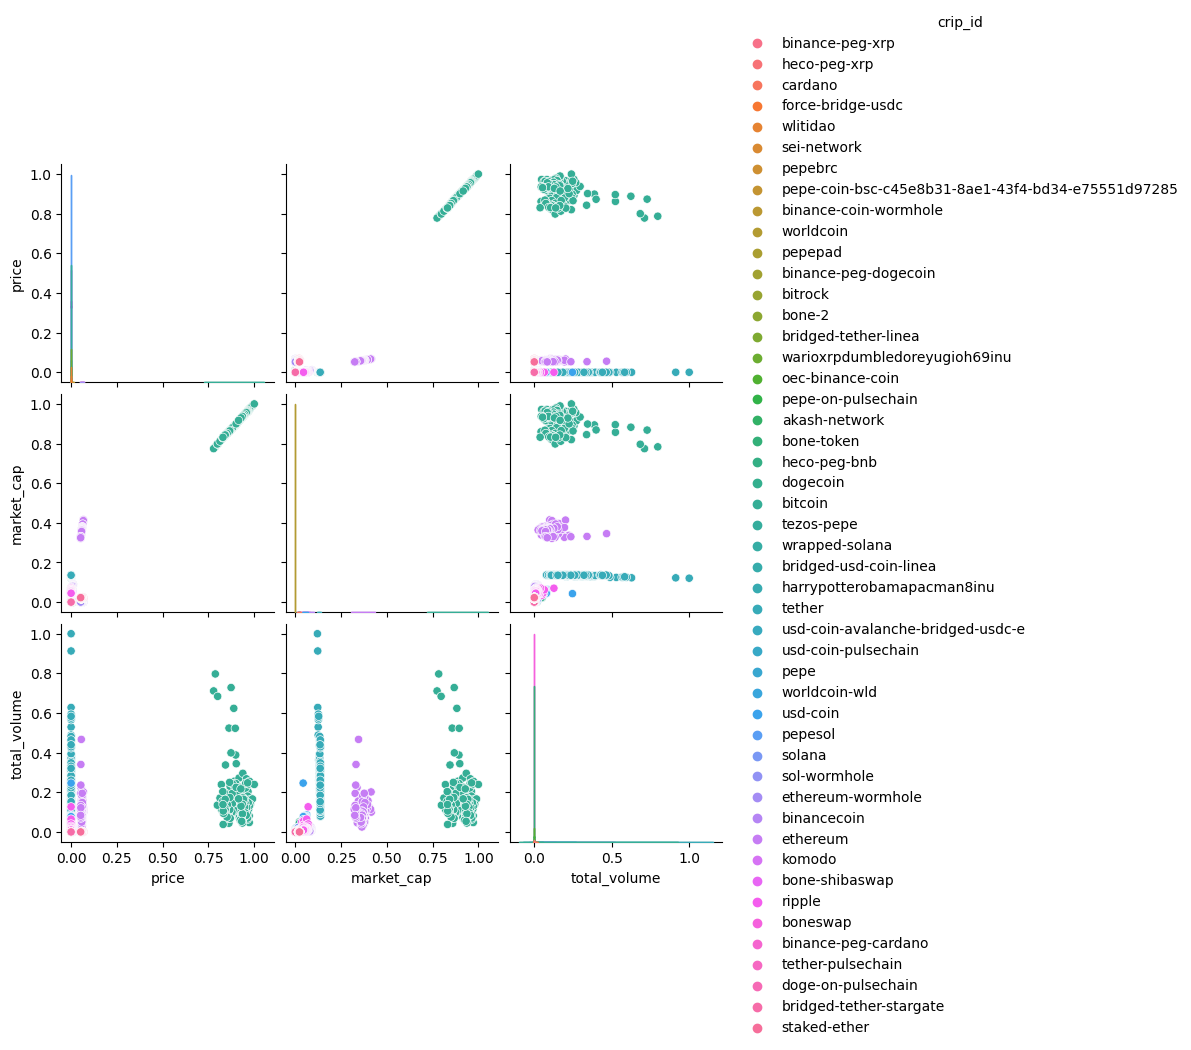

In [74]:
sns.pairplot(prices_normalized, hue = 'crip_id')

### 📈 OHLC of the currency
[
1594382400000 (time),
1.1 (open),
2.2 (high),
3.3 (low),
4.4 (close)
]

In [76]:
def get_coin_ohlc_list(crip_id):
    url = f"https://api.coingecko.com/api/v3/coins/{crip_id}/ohlc?vs_currency=usd&days=30&precision=5"
        
    response = requests.get(url)
        
    if response.status_code == 200:
        list_of_ohlc = response.json()
        df = pd.DataFrame(list_of_ohlc, columns=["timestamp", "open_price", "high_price", "low_price", "close_price"])
        df["crip_id"] = crip_id
        return df
    else:
        print(f"Error en la solicitud: Datos OHLC de {crip_id}", response.status_code)
        if response.status_code == 429:
            print('have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...')
            time.sleep(61)
            return get_coin_ohlc_list(crip_id)

if __name__ == "__main__":
   
    list_of_ohlc_data = pd.DataFrame()

    for crip_id in lista_coins:
        ohlc_data = get_coin_ohlc_list(crip_id)
        if ohlc_data is not None:
            list_of_ohlc_data = pd.concat([list_of_ohlc_data, ohlc_data], ignore_index=True)



Error en la solicitud: Datos OHLC de warioxrpdumbledoreyugioh69inu 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
Error en la solicitud: Datos OHLC de pepesol 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
Error en la solicitud: Datos OHLC de bridged-tether-stargate 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...


In [77]:
list_of_ohlc_data = list_of_ohlc_data.drop_duplicates()

In [78]:
list_of_ohlc_data.isnull().sum()

timestamp      0
open_price     0
high_price     0
low_price      0
close_price    0
crip_id        0
dtype: int64

In [79]:
# No convierto a float32 porque altera demasiado el numero, necesito precicion en esta parte de los datos
print(list_of_ohlc_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7624 entries, 0 to 7623
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    7624 non-null   object 
 1   open_price   7624 non-null   float64
 2   high_price   7624 non-null   float64
 3   low_price    7624 non-null   float64
 4   close_price  7624 non-null   float64
 5   crip_id      7624 non-null   object 
dtypes: float64(4), object(2)
memory usage: 416.9+ KB
None


In [80]:
list_of_ohlc_data.head()

,timestamp,open_price,high_price,low_price,close_price,crip_id
0,1690329600000,0.71364,0.71364,0.71364,0.71364,binance-peg-xrp
1,1690344000000,0.71325,0.71325,0.70307,0.70516,binance-peg-xrp
2,1690358400000,0.71174,0.71174,0.70142,0.70142,binance-peg-xrp
3,1690372800000,0.69892,0.70179,0.69657,0.69657,binance-peg-xrp
4,1690387200000,0.69921,0.70310,0.69921,0.70260,binance-peg-xrp


In [81]:
list_of_ohlc_data['timestamp'] = pd.to_datetime(list_of_ohlc_data['timestamp'], unit='ms')


In [82]:
unique_count = list_of_ohlc_data['crip_id'].nunique()
print(unique_count)


47


##### Guardo csv OHLC:

In [83]:
list_of_ohlc_data.to_csv('../Csvs_cleanned/ohlc_prices.csv', index=False, mode='w',header=True)

### 📃 tickers: Transacciones
Dionary:

last: latest unconverted price in the respective pair target currency

volume: unconverted 24h trading volume in the respective pair target currency

converted_last: latest converted price in BTC, ETH, and USD

converted_volume: converted 24h trading volume in BTC, ETH, and USD

Cache / Update Frequency: every 2 minutes

#### import data:

In [84]:


def get_coin_tickers(coin_id):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/tickers"
        
    response = requests.get(url)
        
    if response.status_code == 200:
        ticker_data = response.json()
        return ticker_data
    else:
        print(f"Error en la solicitud de tickers {crip_id}:", response.status_code)
        if response.status_code == 429:
            print('have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...')
            time.sleep(61)
            return get_coin_tickers(coin_id)  # Reintentar la solicitud después de esperar
            
if __name__ == "__main__":
    tickers_resume = pd.DataFrame()

    for crip_id in lista_coins:
        ticker_data = get_coin_tickers(crip_id)
            
        if ticker_data is not None:
            tickers = ticker_data['tickers']
            
            for ticker in tickers:
                ticker['coin_id'] = crip_id
                
                # Crear un DataFrame a partir de los datos del ticker
                ticker_df = pd.DataFrame([ticker])
                tickers_resume = pd.concat([tickers_resume, ticker_df], ignore_index=True)

Error en la solicitud de tickers binance-peg-dogecoin: 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
Error en la solicitud de tickers akash-network: 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
Error en la solicitud de tickers tether: 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
Error en la solicitud de tickers ethereum: 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
Error en la solicitud de tickers doge-on-pulsechain: 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...


In [85]:
pd.set_option('display.max_colwidth', None)

#### simple and mini ETL

In [86]:
tickers_resume.head(10)

,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id
0,0X1D2F0DA169CEB9FC7B3144628DB156F3F6C60DBE,0XBB4CDB9CBD36B01BD1CBAEBF2DE08D9173BC095C,"{'name': 'Pancakeswap V3 (BSC)', 'identifier': 'pancakeswap-v3-bsc', 'has_trading_incentive': False}",2.376006e-03,5.392102e+05,"{'btc': 1.979e-05, 'eth': 0.00031242, 'usd': 0.516868}","{'btc': 10.804435, 'eth': 170.53, 'usd': 282122}",green,0.602851,2023-08-24T22:34:36+00:00,2023-08-24T22:34:36+00:00,2023-08-24T22:37:49+00:00,False,False,https://pancakeswap.finance/swap?inputCurrency=0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe&outputCurrency=0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,None,binance-peg-xrp,wbnb
1,0X1D2F0DA169CEB9FC7B3144628DB156F3F6C60DBE,WBNB,"{'name': 'PancakeSwap (v2)', 'identifier': 'pancakeswap_new', 'has_trading_incentive': False}",2.388535e-03,5.192399e+04,"{'btc': 1.99e-05, 'eth': 0.00031409, 'usd': 0.519606}","{'btc': 1.03932, 'eth': 16.404841, 'usd': 27139}",green,0.603466,2023-08-24T22:33:31+00:00,2023-08-24T22:33:31+00:00,2023-08-24T22:39:31+00:00,False,False,https://pancakeswap.finance/swap?inputCurrency=0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe&outputCurrency=wbnb,None,binance-peg-xrp,wbnb
2,0X1D2F0DA169CEB9FC7B3144628DB156F3F6C60DBE,0XBB4CDB9CBD36B01BD1CBAEBF2DE08D9173BC095C,"{'name': 'Biswap', 'identifier': 'biswap', 'has_trading_incentive': False}",2.378978e-03,3.228525e+04,"{'btc': 1.982e-05, 'eth': 0.00031283, 'usd': 0.517526}","{'btc': 0.64456428, 'eth': 10.173934, 'usd': 16831.05}",green,0.603503,2023-08-24T22:33:24+00:00,2023-08-24T22:33:24+00:00,2023-08-24T22:39:20+00:00,False,False,https://exchange.biswap.org/#/swap?inputCurrency=0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe&outputCurrency=0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,None,binance-peg-xrp,wbnb
3,0X3EE2200EFB3400FABB9AACF31297CBDD1D435D47,0X1D2F0DA169CEB9FC7B3144628DB156F3F6C60DBE,"{'name': 'PancakeSwap (v2)', 'identifier': 'pancakeswap_new', 'has_trading_incentive': False}",5.110920e-01,4.251834e+03,"{'btc': 1.99e-05, 'eth': 0.00031409, 'usd': 0.519606}","{'btc': 0.04322138, 'eth': 0.68221511, 'usd': 1128.61}",green,0.60689,2023-08-24T21:39:18+00:00,2023-08-24T21:39:18+00:00,2023-08-24T22:39:16+00:00,False,False,https://pancakeswap.finance/swap?inputCurrency=0x3ee2200efb3400fabb9aacf31297cbdd1d435d47&outputCurrency=0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,None,binance-peg-xrp,binance-peg-xrp
4,0X1D2F0DA169CEB9FC7B3144628DB156F3F6C60DBE,0XBB4CDB9CBD36B01BD1CBAEBF2DE08D9173BC095C,"{'name': 'ApeSwap', 'identifier': 'apeswap_bsc', 'has_trading_incentive': False}",2.374630e-03,1.051540e+03,"{'btc': 1.978e-05, 'eth': 0.00031225, 'usd': 0.516572}","{'btc': 0.02100547, 'eth': 0.33154498, 'usd': 548.49}",green,0.615835,2023-08-24T22:18:29+00:00,2023-08-24T22:18:29+00:00,2023-08-24T22:38:17+00:00,False,False,https://apeswap.finance/swap?inputCurrency=0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe&outputCurrency=0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,None,binance-peg-xrp,wbnb
5,0X1D2F0DA169CEB9FC7B3144628DB156F3F6C60DBE,0X55D398326F99059FF775485246999027B3197955,"{'name': 'BabySwap', 'identifier': 'babyswap', 'has_trading_incentive': False}",5.158911e-01,1.874107e+02,"{'btc': 1.976e-05, 'eth': 0.00031192, 'usd': 0.516014}","{'btc': 0.00373101, 'eth': 0.05889104, 'usd': 97.43}",green,0.641487,2023-08-24T21:56:20+00:00,2023-08-24T21:56:20+00:00,2023-08-24T22:39:31+00:00,False,False,https://exchange.babyswap.finance/#/swap?inputCurrency=0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe&outputCurrency=0x55d398326f99059ff775485246999027b3197955,None,binance-peg-xrp,tether
6,0X1D2F0DA169CEB9FC7B3144628DB156F3F6C60DBE,0X55D398326F99059FF775485246999027B3197955,"{'name': 'Mdex BSC', 'identifier': 'mdex_bsc', 'has_trading_incentive': True}",5.190071e-01,1.236241e+04,"{'btc': 1.987e-05, 'eth': 0.00031361, 'usd': 0.518822}","{'btc': 0.24263578, 'eth': 3.8297, '

In [87]:
# Filtrar y mostrar las filas con valores nulos
rows_with_nulls = tickers_resume[tickers_resume.isnull().any(axis=1)]
rows_with_nulls.head(15)
print(rows_with_nulls.shape)

(1647, 18)


In [88]:
tickers_resume['token_info_url'] = tickers_resume['token_info_url'].fillna('not founded token_info_url #404')
tickers_resume['trade_url'] = tickers_resume['trade_url'].fillna('not founded trade_url #404')

In [89]:
tickers_resume['target_coin_id'] = tickers_resume['target_coin_id'].fillna('USD')

In [90]:
tickers_resume.shape

(1658, 18)

In [91]:
tickers_resume.isnull().sum()

base                           0
target                         0
market                         0
last                           0
volume                         0
converted_last                 0
converted_volume               0
trust_score                  159
bid_ask_spread_percentage    101
timestamp                      0
last_traded_at                 0
last_fetch_at                  0
is_anomaly                     0
is_stale                       0
trade_url                      0
token_info_url                 0
coin_id                        0
target_coin_id                 0
dtype: int64

#### Timestamp

In [92]:
# Convertir el formato de timestamp a timestamp numérico y agregar al DataFrame
tickers_resume['timestamp'] = tickers_resume['timestamp'].apply(lambda x: int(datetime.fromisoformat(x).timestamp()) * 1000)
tickers_resume['last_traded_at'] = tickers_resume['last_traded_at'].apply(lambda x: int(datetime.fromisoformat(x).timestamp()) * 1000)
tickers_resume['last_fetch_at'] = tickers_resume['last_fetch_at'].apply(lambda x: int(datetime.fromisoformat(x).timestamp()) * 1000)

In [93]:
tickers_resume.head()

,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id
0,0X1D2F0DA169CEB9FC7B3144628DB156F3F6C60DBE,0XBB4CDB9CBD36B01BD1CBAEBF2DE08D9173BC095C,"{'name': 'Pancakeswap V3 (BSC)', 'identifier': 'pancakeswap-v3-bsc', 'has_trading_incentive': False}",0.002376,539210.233261,"{'btc': 1.979e-05, 'eth': 0.00031242, 'usd': 0.516868}","{'btc': 10.804435, 'eth': 170.53, 'usd': 282122}",green,0.602851,1692916476000,1692916476000,1692916669000,False,False,https://pancakeswap.finance/swap?inputCurrency=0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe&outputCurrency=0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,not founded token_info_url #404,binance-peg-xrp,wbnb
1,0X1D2F0DA169CEB9FC7B3144628DB156F3F6C60DBE,WBNB,"{'name': 'PancakeSwap (v2)', 'identifier': 'pancakeswap_new', 'has_trading_incentive': False}",0.002389,51923.988665,"{'btc': 1.99e-05, 'eth': 0.00031409, 'usd': 0.519606}","{'btc': 1.03932, 'eth': 16.404841, 'usd': 27139}",green,0.603466,1692916411000,1692916411000,1692916771000,False,False,https://pancakeswap.finance/swap?inputCurrency=0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe&outputCurrency=wbnb,not founded token_info_url #404,binance-peg-xrp,wbnb
2,0X1D2F0DA169CEB9FC7B3144628DB156F3F6C60DBE,0XBB4CDB9CBD36B01BD1CBAEBF2DE08D9173BC095C,"{'name': 'Biswap', 'identifier': 'biswap', 'has_trading_incentive': False}",0.002379,32285.254502,"{'btc': 1.982e-05, 'eth': 0.00031283, 'usd': 0.517526}","{'btc': 0.64456428, 'eth': 10.173934, 'usd': 16831.05}",green,0.603503,1692916404000,1692916404000,1692916760000,False,False,https://exchange.biswap.org/#/swap?inputCurrency=0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe&outputCurrency=0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,not founded token_info_url #404,binance-peg-xrp,wbnb
3,0X3EE2200EFB3400FABB9AACF31297CBDD1D435D47,0X1D2F0DA169CEB9FC7B3144628DB156F3F6C60DBE,"{'name': 'PancakeSwap (v2)', 'identifier': 'pancakeswap_new', 'has_trading_incentive': False}",0.511092,4251.833830,"{'btc': 1.99e-05, 'eth': 0.00031409, 'usd': 0.519606}","{'btc': 0.04322138, 'eth': 0.68221511, 'usd': 1128.61}",green,0.60689,1692913158000,1692913158000,1692916756000,False,False,https://pancakeswap.finance/swap?inputCurrency=0x3ee2200efb3400fabb9aacf31297cbdd1d435d47&outputCurrency=0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,not founded token_info_url #404,binance-peg-xrp,binance-peg-xrp
4,0X1D2F0DA169CEB9FC7B3144628DB156F3F6C60DBE,0XBB4CDB9CBD36B01BD1CBAEBF2DE08D9173BC095C,"{'name': 'ApeSwap', 'identifier': 'apeswap_bsc', 'has_trading_incentive': False}",0.002375,1051.539673,"{'btc': 1.978e-05, 'eth': 0.00031225, 'usd': 0.516572}","{'btc': 0.02100547, 'eth': 0.33154498, 'usd': 548.49}",green,0.615835,1692915509000,1692915509000,1692916697000,False,False,https://apeswap.finance/swap?inputCurrency=0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe&outputCurrency=0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,not founded token_info_url #404,binance-peg-xrp,wbnb


#### market

In [94]:
tickers_resume['marketplace'] = tickers_resume['market'].apply(lambda x: x['name'])
tickers_resume['marketplace_id'] = tickers_resume['market'].apply(lambda x: x['identifier'])

In [95]:
tickers_resume.head()

,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id,marketplace,marketplace_id
0,0X1D2F0DA169CEB9FC7B3144628DB156F3F6C60DBE,0XBB4CDB9CBD36B01BD1CBAEBF2DE08D9173BC095C,"{'name': 'Pancakeswap V3 (BSC)', 'identifier': 'pancakeswap-v3-bsc', 'has_trading_incentive': False}",0.002376,539210.233261,"{'btc': 1.979e-05, 'eth': 0.00031242, 'usd': 0.516868}","{'btc': 10.804435, 'eth': 170.53, 'usd': 282122}",green,0.602851,1692916476000,1692916476000,1692916669000,False,False,https://pancakeswap.finance/swap?inputCurrency=0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe&outputCurrency=0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,not founded token_info_url #404,binance-peg-xrp,wbnb,Pancakeswap V3 (BSC),pancakeswap-v3-bsc
1,0X1D2F0DA169CEB9FC7B3144628DB156F3F6C60DBE,WBNB,"{'name': 'PancakeSwap (v2)', 'identifier': 'pancakeswap_new', 'has_trading_incentive': False}",0.002389,51923.988665,"{'btc': 1.99e-05, 'eth': 0.00031409, 'usd': 0.519606}","{'btc': 1.03932, 'eth': 16.404841, 'usd': 27139}",green,0.603466,1692916411000,1692916411000,1692916771000,False,False,https://pancakeswap.finance/swap?inputCurrency=0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe&outputCurrency=wbnb,not founded token_info_url #404,binance-peg-xrp,wbnb,PancakeSwap (v2),pancakeswap_new
2,0X1D2F0DA169CEB9FC7B3144628DB156F3F6C60DBE,0XBB4CDB9CBD36B01BD1CBAEBF2DE08D9173BC095C,"{'name': 'Biswap', 'identifier': 'biswap', 'has_trading_incentive': False}",0.002379,32285.254502,"{'btc': 1.982e-05, 'eth': 0.00031283, 'usd': 0.517526}","{'btc': 0.64456428, 'eth': 10.173934, 'usd': 16831.05}",green,0.603503,1692916404000,1692916404000,1692916760000,False,False,https://exchange.biswap.org/#/swap?inputCurrency=0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe&outputCurrency=0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,not founded token_info_url #404,binance-peg-xrp,wbnb,Biswap,biswap
3,0X3EE2200EFB3400FABB9AACF31297CBDD1D435D47,0X1D2F0DA169CEB9FC7B3144628DB156F3F6C60DBE,"{'name': 'PancakeSwap (v2)', 'identifier': 'pancakeswap_new', 'has_trading_incentive': False}",0.511092,4251.833830,"{'btc': 1.99e-05, 'eth': 0.00031409, 'usd': 0.519606}","{'btc': 0.04322138, 'eth': 0.68221511, 'usd': 1128.61}",green,0.60689,1692913158000,1692913158000,1692916756000,False,False,https://pancakeswap.finance/swap?inputCurrency=0x3ee2200efb3400fabb9aacf31297cbdd1d435d47&outputCurrency=0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,not founded token_info_url #404,binance-peg-xrp,binance-peg-xrp,PancakeSwap (v2),pancakeswap_new
4,0X1D2F0DA169CEB9FC7B3144628DB156F3F6C60DBE,0XBB4CDB9CBD36B01BD1CBAEBF2DE08D9173BC095C,"{'name': 'ApeSwap', 'identifier': 'apeswap_bsc', 'has_trading_incentive': False}",0.002375,1051.539673,"{'btc': 1.978e-05, 'eth': 0.00031225, 'usd': 0.516572}","{'btc': 0.02100547, 'eth': 0.33154498, 'usd': 548.49}",green,0.615835,1692915509000,1692915509000,1692916697000,False,False,https://apeswap.finance/swap?inputCurrency=0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe&outputCurrency=0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,not founded token_info_url #404,binance-peg-xrp,wbnb,ApeSwap,apeswap_bsc


#### converted_last


In [96]:
tickers_resume['converted_last_btc'] = tickers_resume['converted_last'].apply(lambda x: x['btc'])
tickers_resume['converted_last_eth'] = tickers_resume['converted_last'].apply(lambda x: x['eth'])
tickers_resume['converted_last_usd'] = tickers_resume['converted_last'].apply(lambda x: x['usd'])

In [97]:
tickers_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   base                       1658 non-null   object 
 1   target                     1658 non-null   object 
 2   market                     1658 non-null   object 
 3   last                       1658 non-null   float64
 4   volume                     1658 non-null   float64
 5   converted_last             1658 non-null   object 
 6   converted_volume           1658 non-null   object 
 7   trust_score                1499 non-null   object 
 8   bid_ask_spread_percentage  1557 non-null   object 
 9   timestamp                  1658 non-null   int64  
 10  last_traded_at             1658 non-null   int64  
 11  last_fetch_at              1658 non-null   int64  
 12  is_anomaly                 1658 non-null   bool   
 13  is_stale                   1658 non-null   bool 

In [98]:
tickers_resume.head()

,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,...,is_stale,trade_url,token_info_url,coin_id,target_coin_id,marketplace,marketplace_id,converted_last_btc,converted_last_eth,converted_last_usd
0,0X1D2F0DA169CEB9FC7B3144628DB156F3F6C60DBE,0XBB4CDB9CBD36B01BD1CBAEBF2DE08D9173BC095C,"{'name': 'Pancakeswap V3 (BSC)', 'identifier': 'pancakeswap-v3-bsc', 'has_trading_incentive': False}",0.002376,539210.233261,"{'btc': 1.979e-05, 'eth': 0.00031242, 'usd': 0.516868}","{'btc': 10.804435, 'eth': 170.53, 'usd': 282122}",green,0.602851,1692916476000,...,False,https://pancakeswap.finance/swap?inputCurrency=0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe&outputCurrency=0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,not founded token_info_url #404,binance-peg-xrp,wbnb,Pancakeswap V3 (BSC),pancakeswap-v3-bsc,0.00002,0.000312,0.516868
1,0X1D2F0DA169CEB9FC7B3144628DB156F3F6C60DBE,WBNB,"{'name': 'PancakeSwap (v2)', 'identifier': 'pancakeswap_new', 'has_trading_incentive': False}",0.002389,51923.988665,"{'btc': 1.99e-05, 'eth': 0.00031409, 'usd': 0.519606}","{'btc': 1.03932, 'eth': 16.404841, 'usd': 27139}",green,0.603466,1692916411000,...,False,https://pancakeswap.finance/swap?inputCurrency=0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe&outputCurrency=wbnb,not founded token_info_url #404,binance-peg-xrp,wbnb,PancakeSwap (v2),pancakeswap_new,0.00002,0.000314,0.519606
2,0X1D2F0DA169CEB9FC7B3144628DB156F3F6C60DBE,0XBB4CDB9CBD36B01BD1CBAEBF2DE08D9173BC095C,"{'name': 'Biswap', 'identifier': 'biswap', 'has_trading_incentive': False}",0.002379,32285.254502,"{'btc': 1.982e-05, 'eth': 0.00031283, 'usd': 0.517526}","{'btc': 0.64456428, 'eth': 10.173934, 'usd': 16831.05}",green,0.603503,1692916404000,...,False,https://exchange.biswap.org/#/swap?inputCurrency=0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe&outputCurrency=0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,not founded token_info_url #404,binance-peg-xrp,wbnb,Biswap,biswap,0.00002,0.000313,0.517526
3,0X3EE2200EFB3400FABB9AACF31297CBDD1D435D47,0X1D2F0DA169CEB9FC7B3144628DB156F3F6C60DBE,"{'name': 'PancakeSwap (v2)', 'identifier': 'pancakeswap_new', 'has_trading_incentive': False}",0.511092,4251.833830,"{'btc': 1.99e-05, 'eth': 0.00031409, 'usd': 0.519606}","{'btc': 0.04322138, 'eth': 0.68221511, 'usd': 1128.61}",green,0.60689,1692913158000,...,False,https://pancakeswap.finance/swap?inputCurrency=0x3ee2200efb3400fabb9aacf31297cbdd1d435d47&outputCurrency=0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,not founded token_info_url #404,binance-peg-xrp,binance-peg-xrp,PancakeSwap (v2),pancakeswap_new,0.00002,0.000314,0.519606
4,0X1D2F0DA169CEB9FC7B3144628DB156F3F6C60DBE,0XBB4CDB9CBD36B01BD1CBAEBF2DE08D9173BC095C,"{'name': 'ApeSwap', 'identifier': 'apeswap_bsc', 'has_trading_incentive': False}",0.002375,1051.539673,"{'btc': 1.978e-05, 'eth': 0.00031225, 'usd': 0.516572}","{'btc': 0.02100547, 'eth': 0.33154498, 'usd': 548.49}",green,0.615835,1692915509000,...,False,https://apeswap.finance/swap?inputCurrency=0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe&outputCurrency=0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,not founded token_info_url #404,binance-peg-xrp,wbnb,ApeSwap,apeswap_bsc,0.00002,0.000312,0.516572


#### converted_volume


In [99]:
tickers_resume['converted_volume_btc'] = tickers_resume['converted_volume'].apply(lambda x: x['btc'])
tickers_resume['converted_volume_eth'] = tickers_resume['converted_volume'].apply(lambda x: x['eth'])
tickers_resume['converted_volume_usd'] = tickers_resume['converted_volume'].apply(lambda x: x['usd'])

In [100]:
tickers_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   base                       1658 non-null   object 
 1   target                     1658 non-null   object 
 2   market                     1658 non-null   object 
 3   last                       1658 non-null   float64
 4   volume                     1658 non-null   float64
 5   converted_last             1658 non-null   object 
 6   converted_volume           1658 non-null   object 
 7   trust_score                1499 non-null   object 
 8   bid_ask_spread_percentage  1557 non-null   object 
 9   timestamp                  1658 non-null   int64  
 10  last_traded_at             1658 non-null   int64  
 11  last_fetch_at              1658 non-null   int64  
 12  is_anomaly                 1658 non-null   bool   
 13  is_stale                   1658 non-null   bool 

In [101]:
column_drop = ['market','converted_last','converted_volume']
# Eliminar las columnas del DataFrame
tickers_resume = tickers_resume.drop(columns=column_drop)

In [102]:
tickers_resume = tickers_resume.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [103]:
tickers_resume.head()

,base,target,last,volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,...,coin_id,target_coin_id,marketplace,marketplace_id,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,0.002376,539210.233261,green,0.602851,1692916476000,1692916476000,1692916669000,False,...,binance-peg-xrp,wbnb,pancakeswap v3 (bsc),pancakeswap-v3-bsc,0.00002,0.000312,0.516868,10.804435,170.530000,282122.00
1,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,wbnb,0.002389,51923.988665,green,0.603466,1692916411000,1692916411000,1692916771000,False,...,binance-peg-xrp,wbnb,pancakeswap (v2),pancakeswap_new,0.00002,0.000314,0.519606,1.039320,16.404841,27139.00
2,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,0.002379,32285.254502,green,0.603503,1692916404000,1692916404000,1692916760000,False,...,binance-peg-xrp,wbnb,biswap,biswap,0.00002,0.000313,0.517526,0.644564,10.173934,16831.05
3,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,0.511092,4251.833830,green,0.606890,1692913158000,1692913158000,1692916756000,False,...,binance-peg-xrp,binance-peg-xrp,pancakeswap (v2),pancakeswap_new,0.00002,0.000314,0.519606,0.043221,0.682215,1128.61
4,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,0.002375,1051.539673,green,0.615835,1692915509000,1692915509000,1692916697000,False,...,binance-peg-xrp,wbnb,apeswap,apeswap_bsc,0.00002,0.000312,0.516572,0.021005,0.331545,548.49


In [104]:
tickers_resume['timestamp'] = pd.to_datetime(tickers_resume['timestamp'], unit='ms')
tickers_resume['last_traded_at'] = pd.to_datetime(tickers_resume['last_traded_at'], unit='ms')
tickers_resume['last_fetch_at'] = pd.to_datetime(tickers_resume['last_fetch_at'], unit='ms')

In [105]:
# Renombrar la columna
tickers_resume.rename(columns={'coin_id': 'crip_id'}, inplace=True)

##### Guardo ticker.csv:

In [106]:
tickers_resume.to_csv('../Csvs_cleanned/tickers_resume.csv', index=False, mode='w',header=True)

In [107]:
tickers_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   base                       1658 non-null   object        
 1   target                     1658 non-null   object        
 2   last                       1658 non-null   float64       
 3   volume                     1658 non-null   float64       
 4   trust_score                1499 non-null   object        
 5   bid_ask_spread_percentage  1557 non-null   float64       
 6   timestamp                  1658 non-null   datetime64[ns]
 7   last_traded_at             1658 non-null   datetime64[ns]
 8   last_fetch_at              1658 non-null   datetime64[ns]
 9   is_anomaly                 1658 non-null   bool          
 10  is_stale                   1658 non-null   bool          
 11  trade_url                  1658 non-null   object        
 12  token_

#### ticker_df numeric cols correlation matrix

In [108]:

# Seleccionar solo las columnas numéricas
numeric_columns = tickers_resume.select_dtypes(include=['float32', 'float64', 'int32', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

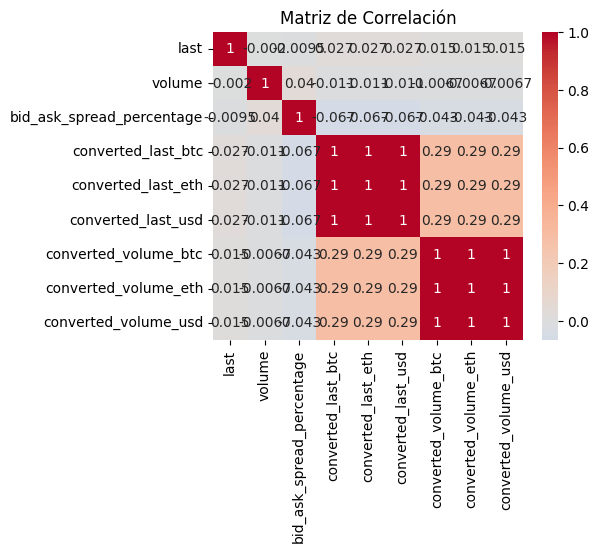

In [109]:
# Crear un heatmap utilizando seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de Correlación")
plt.show()

#### Producto ticker_df:

In [110]:
# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [111]:
tickers_resume.head(10)

,base,target,last,volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,crip_id,target_coin_id,marketplace,marketplace_id,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,2.376006e-03,5.392102e+05,green,0.602851,2023-08-24 22:34:36,2023-08-24 22:34:36,2023-08-24 22:37:49,False,False,https://pancakeswap.finance/swap?inputcurrency=0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe&outputcurrency=0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,not founded token_info_url #404,binance-peg-xrp,wbnb,pancakeswap v3 (bsc),pancakeswap-v3-bsc,0.00002,0.000312,0.516868,10.804435,170.530000,282122.000000
1,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,wbnb,2.388535e-03,5.192399e+04,green,0.603466,2023-08-24 22:33:31,2023-08-24 22:33:31,2023-08-24 22:39:31,False,False,https://pancakeswap.finance/swap?inputcurrency=0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe&outputcurrency=wbnb,not founded token_info_url #404,binance-peg-xrp,wbnb,pancakeswap (v2),pancakeswap_new,0.00002,0.000314,0.519606,1.039320,16.404841,27139.000000
2,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,2.378978e-03,3.228525e+04,green,0.603503,2023-08-24 22:33:24,2023-08-24 22:33:24,2023-08-24 22:39:20,False,False,https://exchange.biswap.org/#/swap?inputcurrency=0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe&outputcurrency=0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,not founded token_info_url #404,binance-peg-xrp,wbnb,biswap,biswap,0.00002,0.000313,0.517526,0.644564,10.173934,16831.050000
3,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,5.110920e-01,4.251834e+03,green,0.606890,2023-08-24 21:39:18,2023-08-24 21:39:18,2023-08-24 22:39:16,False,False,https://pancakeswap.finance/swap?inputcurrency=0x3ee2200efb3400fabb9aacf31297cbdd1d435d47&outputcurrency=0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,not founded token_info_url #404,binance-peg-xrp,binance-peg-xrp,pancakeswap (v2),pancakeswap_new,0.00002,0.000314,0.519606,0.043221,0.682215,1128.610000
4,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,2.374630e-03,1.051540e+03,green,0.615835,2023-08-24 22:18:29,2023-08-24 22:18:29,2023-08-24 22:38:17,False,False,https://apeswap.finance/swap?inputcurrency=0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe&outputcurrency=0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,not founded token_info_url #404,binance-peg-xrp,wbnb,apeswap,apeswap_bsc,0.00002,0.000312,0.516572,0.021005,0.331545,548.490000
5,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,0x55d398326f99059ff775485246999027b3197955,5.158911e-01,1.874107e+02,green,0.641487,2023-08-24 21:56:20,2023-08-24 21:56:20,2023-08-24 22:39:31,False,False,https://exchange.babyswap.finance/#/swap?inputcurrency=0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe&outputcurrency=0x55d398326f99059ff775485246999027b3197955,not founded token_info_url #404,binance-peg-xrp,tether,babyswap,babyswap,0.00002,0.000312,0.516014,0.003731,0.058891,97.430000
6,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,0x55d398326f99059ff775485246999027b3197955,5.190071e-01,1.236241e+04,yellow,0.608235,2023-08-24 22:18:30,2023-08-24 22:18:30,2023-08-24 22:38:18,False,False,https://bsc.mdex.com/#/swap?outputcurrency=0x55d398326f99059ff775485246999027b3197955&inputcurrency=0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,not founded token_info_url #404,binance-peg-xrp,tether,mdex bsc,mdex_bsc,0.00002,0.000314,0.518822,0.242636,3.829700,6335.670000
7,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,0x7130d2a12b9bcbfae4f2634d864a1ee1ce3ead9c,1.976107e-05,4.628358e+01,yellow,0.689839,2023-08-24 15:12:20,2023-08-24 15:12:20,2023-08-24 22:39:18,False,False,https://pancakeswap.finance/swap?inputcurrency=0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe&outputcurrency=0x7130d2a12b9bcbfae4f2634d864a1ee1ce3ead9c,not 

### normalized ticker_df for ML then

In [112]:
# Seleccionar solo las columnas numéricas
numeric_columns = tickers_resume.select_dtypes(include=['float32', 'float64', 'int32', 'int64'])

In [113]:
numeric_columns.head()

,last,volume,bid_ask_spread_percentage,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,0.002376,539210.233261,0.602851,0.00002,0.000312,0.516868,10.804435,170.530000,282122.00
1,0.002389,51923.988665,0.603466,0.00002,0.000314,0.519606,1.039320,16.404841,27139.00
2,0.002379,32285.254502,0.603503,0.00002,0.000313,0.517526,0.644564,10.173934,16831.05
3,0.511092,4251.833830,0.606890,0.00002,0.000314,0.519606,0.043221,0.682215,1128.61
4,0.002375,1051.539673,0.615835,0.00002,0.000312,0.516572,0.021005,0.331545,548.49


In [114]:
# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Aplicar la normalización Min-Max al DataFrame
normalized_numeric_columns = scaler.fit_transform(numeric_columns)

# Crear un nuevo DataFrame normalizado
normalized_df = pd.DataFrame(normalized_numeric_columns, columns=numeric_columns.columns)

In [115]:
normalized_df.head()

,last,volume,bid_ask_spread_percentage,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,7.116303e-10,5.578014e-11,0.009691,0.00002,0.00002,0.00002,2.021372e-04,2.021154e-04,2.021190e-04
1,7.153831e-10,5.371425e-12,0.009701,0.00002,0.00002,0.00002,1.944434e-05,1.944332e-05,1.944302e-05
2,7.125205e-10,3.339840e-12,0.009701,0.00002,0.00002,0.00002,1.205896e-05,1.205833e-05,1.205816e-05
3,1.530756e-07,4.398431e-13,0.009757,0.00002,0.00002,0.00002,8.086063e-07,8.085636e-07,8.085526e-07
4,7.112183e-10,1.087795e-13,0.009903,0.00002,0.00002,0.00002,3.929750e-07,3.929428e-07,3.929407e-07


##### Guardo normalized_tickers_resume.csv

In [116]:
normalized_df.to_csv('../Csvs_cleanned/normalized_tickers_resume.csv', index=False, mode='w',header=True)

### 🌎📊 Global Eecentralized Finance(defi) data: # Aún no utiliazda...
Code	Description
defi_market_cap	
Defi Market Capitalization in USD

eth_market_cap	
Ethereum Market Capitalization in USD

defi_to_eth_ratio	
defi_market_cap to eth_market_cap ratio

trading_volume_24h	
defi trading volume in 24h in USD

defi_dominance	
defi_market_cap to total_market_cap ratio

top_coin_name	
defi coin with largest market_cap

top_coin_dominance	
top defi coin market dominance

In [117]:
def get_coin_list():
    url = "https://api.coingecko.com/api/v3/global/decentralized_finance_defi"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        global_ecentralized_data = response.json()
        list_of_global_ecentralized_data = pd.DataFrame(global_ecentralized_data)
        return list_of_global_ecentralized_data
    else:
        print("Error en la solicitud: Listado de monedas", response.status_code)
        return None

if __name__ == "__main__":
    list_of_global_ecentralized_data = get_coin_list()
    if list_of_global_ecentralized_data is not None:
        print(list_of_global_ecentralized_data)


                                                                                     data
defi_dominance            3.7930179808500761687053069813824632021627713809819090883950413
defi_market_cap                                           41483400098.4714184155915276669
defi_to_eth_ratio        20.8723250548893089056049954392835057807754573355976309621564098
eth_market_cap                                           198748342551.1045210725005058033
top_coin_defi_dominance                                                         33.336598
top_coin_name                                                           Lido Staked Ether
trading_volume_24h                                       1345964039.228136978597983635992


### notas: En un futuro me gustaria agregar webscraping, para lectura de diarions, novedades paginas con valor agregado en informacion sobre los mercados, no solo de criptomonedas si no tambien del mundo global, acciones de empresas, bonos estatales, por ejemplo..

_________________________________________

### BTC - Historicaldata:

In [118]:
bitcoin_url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=max&precision=full"
bitcoin_response = requests.get(bitcoin_url)
bitcoin_data = bitcoin_response.json()

# Extraer los valores de timestamp de cada lista en la columna 'timestamp'
timestamps = [item[0] for item in bitcoin_data['prices']]

# Crear el dataframe con los datos históricos de Bitcoin
df_bit = pd.DataFrame({
    'timestamp': pd.to_datetime(timestamps, unit='ms'),
    'prices': [item[1] for item in bitcoin_data['prices']],
    'market_caps': [item[1] for item in bitcoin_data['market_caps']],
    'total_volumes': [item[1] for item in bitcoin_data['total_volumes']]
})


# Mostrar las últimas 50 filas del dataframe
print(df_bit.head(50))
print(df_bit.tail(50))

    timestamp    prices   market_caps  total_volumes
0  2013-04-28  135.3000  1.500518e+09            0.0
1  2013-04-29  141.9600  1.575032e+09            0.0
2  2013-04-30  135.3000  1.501657e+09            0.0
3  2013-05-01  117.0000  1.298952e+09            0.0
4  2013-05-02  103.4300  1.148668e+09            0.0
5  2013-05-03   91.0100  1.011066e+09            0.0
6  2013-05-04  111.2500  1.236352e+09            0.0
7  2013-05-05  116.7900  1.298378e+09            0.0
8  2013-05-06  118.3300  1.315992e+09            0.0
9  2013-05-07  106.4000  1.183766e+09            0.0
10 2013-05-08  112.6400  1.253655e+09            0.0
11 2013-05-09  113.0000  1.258131e+09            0.0
12 2013-05-10  118.7800  1.322989e+09            0.0
13 2013-05-11  113.0100  1.259239e+09            0.0
14 2013-05-12  114.7130  1.278709e+09            0.0
15 2013-05-13  117.1800  1.306721e+09            0.0
16 2013-05-14  114.5000  1.277279e+09            0.0
17 2013-05-15  114.1560  1.273850e+09         

In [120]:
df_bit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3771 entries, 0 to 3770
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      3771 non-null   datetime64[ns]
 1   prices         3771 non-null   float64       
 2   market_caps    3770 non-null   float64       
 3   total_volumes  3771 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 118.0 KB


In [121]:
df_bit.isnull().sum()

timestamp        0
prices           0
market_caps      1
total_volumes    0
dtype: int64

In [122]:
df_bit.drop_duplicates()

,timestamp,prices,market_caps,total_volumes
0,2013-04-28 00:00:00,135.300000,1.500518e+09,0.000000e+00
1,2013-04-29 00:00:00,141.960000,1.575032e+09,0.000000e+00
2,2013-04-30 00:00:00,135.300000,1.501657e+09,0.000000e+00
3,2013-05-01 00:00:00,117.000000,1.298952e+09,0.000000e+00
4,2013-05-02 00:00:00,103.430000,1.148668e+09,0.000000e+00
...,...,...,...,...
3766,2023-08-22 00:00:00,26119.005959,5.084919e+11,9.377753e+09
3767,2023-08-23 00:00:00,26033.675407,5.063562e+11,1.370294e+10
3768,2023-08-24 00:00:00,26450.008625,5.149558e+11,1.460057e+10
3769,2023-08-25 00:00:00,26134.934255,5.089070e+11,1.196132e+10


In [123]:
df_bit = df_bit.dropna()

In [124]:
df_bit.describe()

,timestamp,prices,market_caps,total_volumes
count,3770,3770.000000,3.770000e+03,3.770000e+03
mean,2018-06-27 22:34:58.032184832,12053.826089,2.241265e+11,1.410120e+10
min,2013-04-28 00:00:00,67.809000,7.713681e+08,0.000000e+00
25%,2015-11-28 06:00:00,570.517925,7.382530e+09,1.351220e+08
50%,2018-06-28 12:00:00,6396.054073,1.109786e+11,3.665805e+09
75%,2021-01-25 18:00:00,18341.977615,3.389352e+11,2.414863e+10
max,2023-08-25 09:46:17,67617.015545,1.278798e+12,1.788941e+11
std,NaN,15595.944029,2.957555e+11,1.835910e+10


#### Grafico BTC prices:

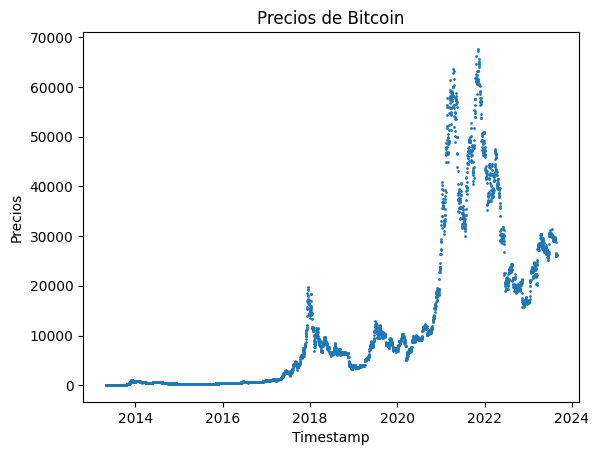

In [125]:
# Ploteamos
x = df_bit['timestamp']
y = df_bit['prices']

plt.scatter(x, y, s=1)
plt.title("Precios de Bitcoin")
plt.xlabel("Timestamp")
plt.ylabel("Precios")
plt.show()

In [126]:
df_bit.to_csv('../EDA_ETL_Hybrid_analisis_Csvs_Cleaned/df_bit.csv',mode='w', index=True)

### ETH - Historicaldata:

In [4]:
bitcoin_url = "https://api.coingecko.com/api/v3/coins/ethereum/market_chart?vs_currency=usd&days=max&precision=full"
bitcoin_response = requests.get(bitcoin_url)
bitcoin_data = bitcoin_response.json()

# Extraer los valores de timestamp de cada lista en la columna 'timestamp'
timestamps = [item[0] for item in bitcoin_data['prices']]

# Crear el dataframe con los datos históricos de Bitcoin
df_bit = pd.DataFrame({
    'timestamp': pd.to_datetime(timestamps, unit='ms'),
    'prices': [item[1] for item in bitcoin_data['prices']],
    'market_caps': [item[1] for item in bitcoin_data['market_caps']],
    'total_volumes': [item[1] for item in bitcoin_data['total_volumes']]
})


# Mostrar las últimas 50 filas del dataframe
print(df_bit.head(50))
print(df_bit.tail(50))

    timestamp    prices   market_caps  total_volumes
0  2015-08-07  2.831620  0.000000e+00   9.062200e+04
1  2015-08-08  1.330750  8.033948e+07   3.680700e+05
2  2015-08-10  0.687586  4.155631e+07   4.004641e+05
3  2015-08-11  1.067379  6.453901e+07   1.518998e+06
4  2015-08-12  1.256613  7.601326e+07   2.073893e+06
5  2015-08-13  1.825395  1.104688e+08   4.380143e+06
6  2015-08-14  1.825975  1.105553e+08   4.355618e+06
7  2015-08-15  1.670950  1.012152e+08   2.519633e+06
8  2015-08-16  1.476607  8.948094e+07   3.032658e+06
9  2015-08-17  1.203871  8.731339e+07   1.880092e+06
10 2015-08-18  1.281393  9.295786e+07   1.696013e+06
11 2015-08-19  1.252739  9.092070e+07   1.537201e+06
12 2015-08-20  1.484195  1.077492e+08   2.967731e+06
13 2015-08-21  1.406315  1.021310e+08   1.742882e+06
14 2015-08-22  1.380722  1.003088e+08   9.145887e+05
15 2015-08-23  1.355182  9.848800e+07   1.610696e+06
16 2015-08-24  1.246572  9.062595e+07   6.964766e+05
17 2015-08-25  1.160828  8.442311e+07   1.0531

In [5]:
df_bit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2941 entries, 0 to 2940
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      2941 non-null   datetime64[ns]
 1   prices         2941 non-null   float64       
 2   market_caps    2940 non-null   float64       
 3   total_volumes  2941 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 92.0 KB


In [6]:
df_bit.isnull().sum()

timestamp        0
prices           0
market_caps      1
total_volumes    0
dtype: int64

In [7]:
df_bit.drop_duplicates()

,timestamp,prices,market_caps,total_volumes
0,2015-08-07 00:00:00,2.831620,0.000000e+00,9.062200e+04
1,2015-08-08 00:00:00,1.330750,8.033948e+07,3.680700e+05
2,2015-08-10 00:00:00,0.687586,4.155631e+07,4.004641e+05
3,2015-08-11 00:00:00,1.067379,6.453901e+07,1.518998e+06
4,2015-08-12 00:00:00,1.256613,7.601326e+07,2.073893e+06
...,...,...,...,...
2936,2023-08-22 00:00:00,1666.840465,2.004394e+11,6.712094e+09
2937,2023-08-23 00:00:00,1635.191294,1.965413e+11,1.010845e+10
2938,2023-08-24 00:00:00,1679.123993,2.017639e+11,1.082396e+10
2939,2023-08-25 00:00:00,1658.399654,1.993120e+11,6.850697e+09


In [8]:
df_bit = df_bit.dropna()

In [9]:
df_bit.describe()

,timestamp,prices,market_caps,total_volumes
count,2940,2940.000000,2.940000e+03,2.940000e+03
mean,2019-08-17 07:03:36.151276032,883.660283,1.024880e+11,9.336978e+09
min,2015-08-07 00:00:00,0.432979,0.000000e+00,8.707480e+04
25%,2017-08-12 18:00:00,127.315269,1.367004e+10,3.900764e+08
50%,2019-08-17 12:00:00,302.085922,2.978706e+10,6.191576e+09
75%,2021-08-21 06:00:00,1573.000496,1.888247e+11,1.360608e+10
max,2023-08-25 20:20:50,4815.004634,5.716658e+11,1.409065e+11
std,NaN,1094.378191,1.305514e+11,1.235147e+10


#### Grafico BTC prices:

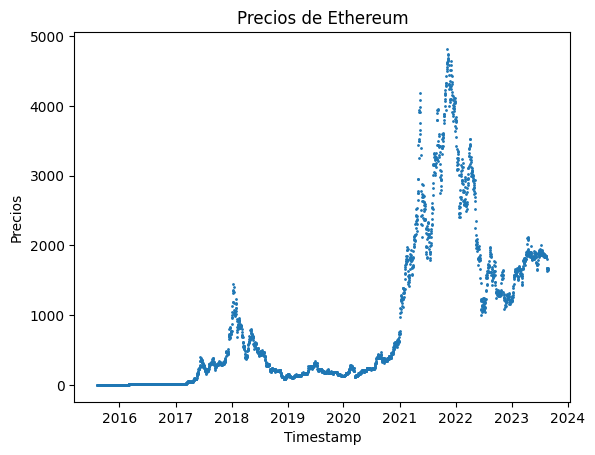

In [10]:
# Ploteamos
x = df_bit['timestamp']
y = df_bit['prices']

plt.scatter(x, y, s=1)
plt.title("Precios de Ethereum")
plt.xlabel("Timestamp")
plt.ylabel("Precios")
plt.show()

In [11]:
df_bit.to_csv('../EDA_ETL_Hybrid_analisis_Csvs_Cleaned/df_eth.csv',mode='w', index=True)